<a href="https://colab.research.google.com/github/Priti732/intrusion_detection_comparison/blob/main/intrusion_detection_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

In [ ]:
dataset=files.upload()

Saving KDDCup99.csv to KDDCup99.csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(dataset['KDDCup99.csv']))

**Preprocessing the data**

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 41:42].values #the 42nd label says whether there is an intrusion or if it is normal
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # The dataset is split into 70% for training and 30% for testing.

In [ ]:
from sklearn.compose import ColumnTransformer # encodes the columns into same type
from sklearn.preprocessing import OneHotEncoder 
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1, 2, 3])], remainder = 'passthrough') # to encode the first 3 columns from string datatype to int datatype
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
y_train[:, 0] = le_y.fit_transform(y_train[:, 0])
y_test[:, 0] = le_y.transform(y_test[:, 0])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

**Random forest classifier Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, n_jobs = -1) # n_estimators = no. of trees in the classified forest; random_state= 42 is initialised to get the same output everytime it runs.
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
total_correct_predictions = 0
for i in range(len(cm)):
    total_correct_predictions+= cm[i][i] # adds only the true positives and the true negatives
rf_accuracy = ( total_correct_predictions / np.sum(cm))*100
print(f'Acuuracy obtained on this test set : {rf_accuracy:.2f} %')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[  627     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     5     0     0     0     0     0     0     0     0     0     3
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    17     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     4     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   371     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     3     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0    

**K means clustering**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=21, random_state=42) # n_clusters refers to the number of the should be formed. In this case the number of labels are 21. So 21 clusters are formed
kmeans.fit(X_train, y_train)
km_y_pred = kmeans.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
km_cm = confusion_matrix(y_test, km_y_pred)
print(km_cm)
km_total_correct_predictions = 0
for j in range(len(km_cm)):
    km_total_correct_predictions+= km_cm[j][j]
km_accuracy = ( km_total_correct_predictions / np.sum(km_cm))*100
print(f'Acuuracy obtained on this test set : {km_accuracy:.2f} %')

[[    0     0     0     0     0     0     0     0   623     0     0     2
      0     0     0     0     0     0     2     0     0     0     0]
 [    3     0     0     0     0     0     0     0     0     0     0     2
      0     1     0     0     0     0     2     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     1     0     0     0     0     0     0     0     0     0]
 [   18     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    4     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [  372     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]

**Gaussian Naive Bayes**


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_y_pred = gnb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix
gnb_cm = confusion_matrix(y_test, gnb_y_pred)
gnb_total_correct_predictions = 0
print(gnb_cm)
for k in range(len(gnb_cm)):
    gnb_total_correct_predictions+= gnb_cm[k][k]
gnb_accuracy = ( gnb_total_correct_predictions / np.sum(gnb_cm))*100
print(f'Acuuracy obtained on this test set : {gnb_accuracy:.2f} %')

[[  613     0     0     0     0     0     0     0     0     0     0    13
      0     0     0     0     0     0     0     0     1     0]
 [    0     5     2     0     0     0     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    17     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     1     0]
 [    0     0     0     0     4     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   356     3     0     0     0    12     0
      0     0     0     1     0     0     0     0     0     0]
 [    0     0     0     0     0     0     3     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0    

**MLP classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-10,hidden_layer_sizes=(21, 5), random_state=42) # lbfgs is optimizer in the family of quasi-Newton methods and it uses limited memory.; 
                                                                                             #hidden_layers is the number of neurons for the output; alpha is the penalty term used to avoid overfitting
clf.fit(X_train,y_train)
pred=clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.metrics import confusion_matrix
mlp_cm = confusion_matrix(y_test, pred)
mlp_total_correct_predictions = 0
for l in range(len(mlp_cm)):
    mlp_total_correct_predictions+= mlp_cm[l][l]
mlp_accuracy = ( mlp_total_correct_predictions / np.sum(mlp_cm))*100
print(f'Acuuracy obtained on this test set : {mlp_accuracy:.2f} %')

Acuuracy obtained on this test set : 63.96 %


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier (random_state = 42) 
dtree.fit (X_train, y_train)
dt_y_pred=dtree.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_total_correct_predictions = 0

for m in range(len(dt_cm)):
    dt_total_correct_predictions+= dt_cm[m][m]
dt_accuracy = ( dt_total_correct_predictions / np.sum(dt_cm))*100
print(f'Acuuracy obtained on this test set : {dt_accuracy:.2f} %')

Acuuracy obtained on this test set : 99.96 %


**Comparing the accuracy of the Machine learning algorithms**

In [ ]:
d=[['Random Forest', rf_accuracy],['K means', km_accuracy],['Gaussian Naive Bayes',gnb_accuracy],['Multi Layer Preceptron',mlp_accuracy],['Decission Tree',dt_accuracy]]

df= pd.DataFrame(d, columns= ['Algorithm', 'Accuracy Score']) 
df.set_index('Algorithm',inplace=True) 
df

,Accuracy Score
Algorithm,
Random Forest,99.977059
K means,59.003009
Gaussian Naive Bayes,94.961068
Multi Layer Preceptron,63.958949
Decission Tree,99.961540


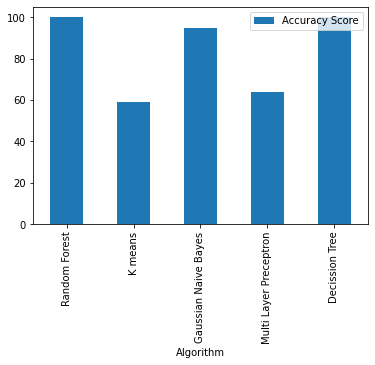

In [ ]:
import matplotlib.pyplot as plt

df.plot.bar()
plt.show()

**Acunetix Data**

In [ ]:
acunetix_dataset=files.upload()

Saving Book1.csv to Book1.csv


In [ ]:
import io
acunetix_dataset = pd.read_csv(io.BytesIO(acunetix_dataset['Book1.csv']))

In [ ]:
print(acunetix_dataset.info)

<bound method DataFrame.info of        website  ...                  type
0         vtop  ...             DOM based
1         vtop  ...             DOM based
2         vtop  ...   client-side attacks
3         vtop  ...   client-side attacks
4         vtop  ...                   DoS
5   codetantra  ...   XML external entity
6   codetantra  ...         UI redressing
7   codetantra  ...             DOM based
8   codetantra  ...             DOM based
9   codetantra  ...   client-side attacks
10  codetantra  ...  cross side scripting
11  codetantra  ...   client-side attacks
12       nptel  ...                  MITM
13       nptel  ...                   DoS
14       nptel  ...       Frame injection
15       nptel  ...                   XSS
16    flipkart  ...  cross side scripting
17    flipkart  ...   client-side attacks
18      amazon  ...         UI redressing
19      amazon  ...                  MITM

[20 rows x 7 columns]>


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


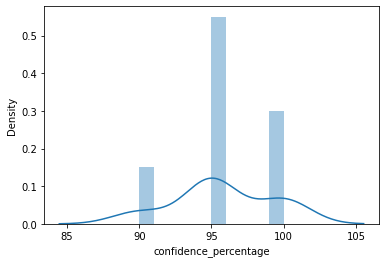

In [ ]:
import seaborn as sns
sns.distplot(acunetix_dataset["confidence_percentage"], bins=10, kde=True )

In [ ]:

a=len(acunetix_dataset)


In [ ]:
n=0
for i in range(a):
  n=n+acunetix_dataset.confidence_percentage[i] # computes the accuracy by averaging the confidence percentage
acunetix_accuracy=(n/a)
print("Accuracy of acunetix: ", acunetix_accuracy)

Accuracy of acunetix:  95.75


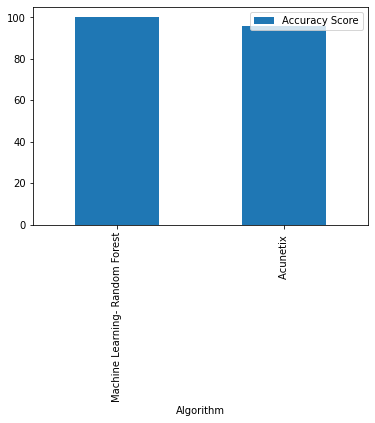

In [ ]:
d=[['Machine Learning- Random Forest', rf_accuracy],['Acunetix ', acunetix_accuracy]]

df= pd.DataFrame(d, columns= ['Algorithm', 'Accuracy Score']) 
df.set_index('Algorithm',inplace=True) 
df
df.plot.bar()
plt.show()